# This notebook has the commands for creating a horizontal bar chart for the ADHD proportion data within communities

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
#filtered_data_arms1 = pd.read_csv("/home/faird/lundq163/projects/FRF_results_viz/GBM_work/fluid_ADHDscores_ARMS2_arms1xgb_merged.csv")
#filtered_data_arms2 = pd.read_csv("/home/faird/lundq163/projects/FRF_results_viz/GBM_work/fluid_ADHDscores_ARMS1_arms2xgb_merged.csv")
filtered_data_arms1 = pd.read_csv("/home/faird/lundq163/projects/FRF_results_viz/GBM_work/list_ADHDscores_ARMS2_arms1xgb_merged.csv")
filtered_data_arms2= pd.read_csv("/home/faird/lundq163/projects/FRF_results_viz/GBM_work/list_ADHDscores_ARMS1_arms2xgb_merged.csv")
#data_arms1 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ADHDscores_list_ARMS1_merged.csv")
#data_arms2 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ADHDscores_list_ARMS2_merged.csv")
#data_arms1 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ADHDscores_fluid_ARMS1_merged.csv")
#data_arms2 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ADHDscores_fluid_ARMS2_merged.csv")
filtered_data_arms1
#data_arms1

,subjectkey,ADHD1,ADHD2,ADHD3,ADHD4,ADHDcomposite,community
0,NDAR_INV00J52GPG,Ctrl,Ctrl,Ctrl,Ctrl,0.364275,3
1,NDAR_INV00NPMHND,Ctrl,Ctrl,Ctrl,Ctrl,-0.413990,1
2,NDAR_INV01NAYMZH,Ctrl,Ctrl,Ctrl,Ctrl,-0.413990,3
3,NDAR_INV021403LF,ADHD,ADHD,Ctrl,Ctrl,1.444422,7
4,NDAR_INV022ZVCT8,Ctrl,Ctrl,Ctrl,Ctrl,-0.413990,4
...,...,...,...,...,...,...,...
3171,NDAR_INVZZ3P1ZFJ,Ctrl,Ctrl,Ctrl,Ctrl,1.137971,0
3172,NDAR_INVZZ6ZJ2KY,Ctrl,Ctrl,Ctrl,Ctrl,-0.189392,3
3173,NDAR_INVZZ81LEEV,Ctrl,Ctrl,Ctrl,Ctrl,-0.189392,0
3174,NDAR_INVZZZ2ALR6,Ctrl,Ctrl,Ctrl,Ctrl,0.033034,1


In [58]:
#currently keeping all communities, regardless of size, because we are trying to evaluate across the arms with the overfit xgb model

#communities_more_than_100_arms1 = data_arms1['community'].value_counts()[data_arms1['community'].value_counts() > 100].index
#communities_more_than_100_arms2 = data_arms2['community'].value_counts()[data_arms2['community'].value_counts() > 100].index
#filtered_data_arms1 = data_arms1[data_arms1['community'].isin(communities_more_than_100_arms1)]
#filtered_data_arms2 = data_arms2[data_arms2['community'].isin(communities_more_than_100_arms2)]
#data_arms1['community'].value_counts()

In [59]:
filtered_data_arms1['community'] = filtered_data_arms1['community'] + 1
filtered_data_arms2['community'] = filtered_data_arms2['community'] + 1

filtered_data_arms1

,subjectkey,ADHD1,ADHD2,ADHD3,ADHD4,ADHDcomposite,community
0,NDAR_INV00J52GPG,Ctrl,Ctrl,Ctrl,Ctrl,0.364275,4
1,NDAR_INV00NPMHND,Ctrl,Ctrl,Ctrl,Ctrl,-0.413990,2
2,NDAR_INV01NAYMZH,Ctrl,Ctrl,Ctrl,Ctrl,-0.413990,4
3,NDAR_INV021403LF,ADHD,ADHD,Ctrl,Ctrl,1.444422,8
4,NDAR_INV022ZVCT8,Ctrl,Ctrl,Ctrl,Ctrl,-0.413990,5
...,...,...,...,...,...,...,...
3171,NDAR_INVZZ3P1ZFJ,Ctrl,Ctrl,Ctrl,Ctrl,1.137971,1
3172,NDAR_INVZZ6ZJ2KY,Ctrl,Ctrl,Ctrl,Ctrl,-0.189392,4
3173,NDAR_INVZZ81LEEV,Ctrl,Ctrl,Ctrl,Ctrl,-0.189392,1
3174,NDAR_INVZZZ2ALR6,Ctrl,Ctrl,Ctrl,Ctrl,0.033034,2


In [60]:
#convert community to a categorical variable to ensure proper ordering on the x-axis
filtered_data_arms1.loc[:, 'community'] = pd.Categorical(filtered_data_arms1['community'])
filtered_data_arms2.loc[:, 'community'] = pd.Categorical(filtered_data_arms2['community'])

In [61]:
#function to determine the grouping of all possible adhd label combinations/conditions

def filter_adhd(df, **conditions):
    query = ' & '.join([f"{k} == '{v}'" for k, v in conditions.items()])
    return df.query(query)

In [62]:
#all the possible adhd label combinations/conditions

conditions_arms1 = [
    {'ADHD1': 'Ctrl', 'ADHD2': 'Ctrl', 'ADHD3': 'Ctrl', 'ADHD4': 'Ctrl'},
    {'ADHD1': 'ADHD', 'ADHD2': 'Ctrl', 'ADHD3': 'Ctrl', 'ADHD4': 'Ctrl'},
    {'ADHD1': 'Ctrl', 'ADHD2': 'ADHD', 'ADHD3': 'Ctrl', 'ADHD4': 'Ctrl'},
    {'ADHD1': 'Ctrl', 'ADHD2': 'Ctrl', 'ADHD3': 'ADHD', 'ADHD4': 'Ctrl'},
    {'ADHD1': 'Ctrl', 'ADHD2': 'Ctrl', 'ADHD3': 'Ctrl', 'ADHD4': 'ADHD'},
    {'ADHD1': 'ADHD', 'ADHD2': 'ADHD', 'ADHD3': 'Ctrl', 'ADHD4': 'Ctrl'},
    {'ADHD1': 'ADHD', 'ADHD2': 'Ctrl', 'ADHD3': 'ADHD', 'ADHD4': 'Ctrl'},
    {'ADHD1': 'ADHD', 'ADHD2': 'Ctrl', 'ADHD3': 'Ctrl', 'ADHD4': 'ADHD'},
    {'ADHD1': 'Ctrl', 'ADHD2': 'ADHD', 'ADHD3': 'ADHD', 'ADHD4': 'Ctrl'},
    {'ADHD1': 'Ctrl', 'ADHD2': 'ADHD', 'ADHD3': 'Ctrl', 'ADHD4': 'ADHD'},
    {'ADHD1': 'Ctrl', 'ADHD2': 'Ctrl', 'ADHD3': 'ADHD', 'ADHD4': 'ADHD'},
    {'ADHD1': 'ADHD', 'ADHD2': 'ADHD', 'ADHD3': 'ADHD', 'ADHD4': 'Ctrl'},
    {'ADHD1': 'ADHD', 'ADHD2': 'ADHD', 'ADHD3': 'Ctrl', 'ADHD4': 'ADHD'},
    {'ADHD1': 'ADHD', 'ADHD2': 'Ctrl', 'ADHD3': 'ADHD', 'ADHD4': 'ADHD'},
    {'ADHD1': 'Ctrl', 'ADHD2': 'ADHD', 'ADHD3': 'ADHD', 'ADHD4': 'ADHD'},
    {'ADHD1': 'ADHD', 'ADHD2': 'ADHD', 'ADHD3': 'ADHD', 'ADHD4': 'ADHD'}
]

conditions_arms2 = conditions_arms1  # The conditions are the same for arms2

In [63]:
#determine the counts for the condition groups

groups_arms1 = [filtered_data_arms1] + [filter_adhd(filtered_data_arms1, **cond) for cond in conditions_arms1]
groups_arms2 = [filtered_data_arms2] + [filter_adhd(filtered_data_arms2, **cond) for cond in conditions_arms2]
groups_arms1

[            subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
 0     NDAR_INV00J52GPG  Ctrl  Ctrl  Ctrl  Ctrl       0.364275          4
 1     NDAR_INV00NPMHND  Ctrl  Ctrl  Ctrl  Ctrl      -0.413990          2
 2     NDAR_INV01NAYMZH  Ctrl  Ctrl  Ctrl  Ctrl      -0.413990          4
 3     NDAR_INV021403LF  ADHD  ADHD  Ctrl  Ctrl       1.444422          8
 4     NDAR_INV022ZVCT8  Ctrl  Ctrl  Ctrl  Ctrl      -0.413990          5
 ...                ...   ...   ...   ...   ...            ...        ...
 3171  NDAR_INVZZ3P1ZFJ  Ctrl  Ctrl  Ctrl  Ctrl       1.137971          1
 3172  NDAR_INVZZ6ZJ2KY  Ctrl  Ctrl  Ctrl  Ctrl      -0.189392          4
 3173  NDAR_INVZZ81LEEV  Ctrl  Ctrl  Ctrl  Ctrl      -0.189392          1
 3174  NDAR_INVZZZ2ALR6  Ctrl  Ctrl  Ctrl  Ctrl       0.033034          2
 3175  NDAR_INVZZZNB0XC  ADHD  ADHD  ADHD  Ctrl       0.899638          2
 
 [3176 rows x 7 columns],
             subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
 0     NDA

In [64]:
#better display of the counts

for group in groups_arms1:
    if not group.empty:
        print(group.head(1))
        print(len(group))

#outputs are in order: total, no adhd, adhd1, adhd2, adhd3, adhd4

         subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
0  NDAR_INV00J52GPG  Ctrl  Ctrl  Ctrl  Ctrl       0.364275          4
3176
         subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
0  NDAR_INV00J52GPG  Ctrl  Ctrl  Ctrl  Ctrl       0.364275          4
2928
           subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
158  NDAR_INV20CNYBBC  ADHD  Ctrl  Ctrl  Ctrl       1.741991          3
7
         subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
3  NDAR_INV021403LF  ADHD  ADHD  Ctrl  Ctrl       1.444422          8
90
          subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
48  NDAR_INV0JAG7BGC  ADHD  ADHD  ADHD  Ctrl       1.936428          4
55
          subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
72  NDAR_INV0UMM15GY  ADHD  ADHD  ADHD  ADHD       3.435609          1
96


In [65]:
for group in groups_arms2:
    if not group.empty:
        print(group.head(1))
        print(len(group))

         subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
0  NDAR_INV003RTV85  Ctrl  Ctrl  Ctrl  Ctrl      -0.638587          3
3146
         subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
0  NDAR_INV003RTV85  Ctrl  Ctrl  Ctrl  Ctrl      -0.638587          3
2931
           subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
316  NDAR_INV2DTHE81G  ADHD  Ctrl  Ctrl  Ctrl        2.79549          6
14
          subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
23  NDAR_INV05LGG3GZ  ADHD  ADHD  Ctrl  Ctrl       1.067142          1
83
           subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
103  NDAR_INV0UPRUMA1  ADHD  ADHD  ADHD  Ctrl       0.098208          2
42
         subjectkey ADHD1 ADHD2 ADHD3 ADHD4  ADHDcomposite  community
6  NDAR_INV00U4FTRU  ADHD  ADHD  ADHD  ADHD       2.920183          2
76


In [66]:
#functions to summarize the label counts into one dataframe

def summarize_by_label(df, label):
    summary = df.groupby(['community', label], observed=False).size().reset_index(name='count')
    return summary[summary[label] == 'ADHD'].assign(ADHD=label)

def summarize_by_label_ctrl(df, label):
    summary = df.groupby(['community', label], observed=False).size().reset_index(name='count')
    return summary[summary[label] == 'Ctrl'].assign(ADHD='Ctrl')

In [67]:
summary_data_arms1_ctrl_adhd1 = summarize_by_label_ctrl(filtered_data_arms1, 'ADHD1')
summary_data_arms1_ADHD1 = summarize_by_label(filtered_data_arms1, 'ADHD1')
summary_data_arms1_ADHD2 = summarize_by_label(filtered_data_arms1, 'ADHD2')
summary_data_arms1_ADHD3 = summarize_by_label(filtered_data_arms1, 'ADHD3')
summary_data_arms1_ADHD4 = summarize_by_label(filtered_data_arms1, 'ADHD4')
summary_data_arms1_ADHD2

,community,ADHD2,count,ADHD
0,1,ADHD,58,ADHD2
2,2,ADHD,51,ADHD2
4,3,ADHD,8,ADHD2
6,4,ADHD,58,ADHD2
8,5,ADHD,24,ADHD2
10,6,ADHD,15,ADHD2
12,7,ADHD,14,ADHD2
14,8,ADHD,4,ADHD2
16,9,ADHD,9,ADHD2


In [68]:
summary_data_arms2_ctrl_adhd1 = summarize_by_label_ctrl(filtered_data_arms2, 'ADHD1')
summary_data_arms2_ADHD1 = summarize_by_label(filtered_data_arms2, 'ADHD1')
summary_data_arms2_ADHD2 = summarize_by_label(filtered_data_arms2, 'ADHD2')
summary_data_arms2_ADHD3 = summarize_by_label(filtered_data_arms2, 'ADHD3')
summary_data_arms2_ADHD4 = summarize_by_label(filtered_data_arms2, 'ADHD4')

In [69]:
total_count = (len(filtered_data_arms1[(filtered_data_arms1["community"]==1)]))
ADHD1_count = (len((filtered_data_arms1[(filtered_data_arms1["ADHD1"]=="ADHD") & (filtered_data_arms1["community"]==1)])))
ADHD2_count = (len((filtered_data_arms1[(filtered_data_arms1["ADHD2"]=="ADHD") & (filtered_data_arms1["community"]==1)])))
ADHD3_count = (len((filtered_data_arms1[(filtered_data_arms1["ADHD3"]=="ADHD") & (filtered_data_arms1["community"]==1)])))
ADHD4_count = (len((filtered_data_arms1[(filtered_data_arms1["ADHD4"]=="ADHD") & (filtered_data_arms1["community"]==1)])))
num_ADHD4 = ADHD4_count
num_ADHD3 = ADHD3_count - ADHD4_count
num_ADHD2 = ADHD2_count - ADHD3_count
num_ADHD1 = ADHD1_count - ADHD2_count 
ctrl_count = total_count - num_ADHD4 - num_ADHD3 - num_ADHD2 - num_ADHD1
num_ADHD3

11

In [70]:
filtered_data_arms1

,subjectkey,ADHD1,ADHD2,ADHD3,ADHD4,ADHDcomposite,community
0,NDAR_INV00J52GPG,Ctrl,Ctrl,Ctrl,Ctrl,0.364275,4
1,NDAR_INV00NPMHND,Ctrl,Ctrl,Ctrl,Ctrl,-0.413990,2
2,NDAR_INV01NAYMZH,Ctrl,Ctrl,Ctrl,Ctrl,-0.413990,4
3,NDAR_INV021403LF,ADHD,ADHD,Ctrl,Ctrl,1.444422,8
4,NDAR_INV022ZVCT8,Ctrl,Ctrl,Ctrl,Ctrl,-0.413990,5
...,...,...,...,...,...,...,...
3171,NDAR_INVZZ3P1ZFJ,Ctrl,Ctrl,Ctrl,Ctrl,1.137971,1
3172,NDAR_INVZZ6ZJ2KY,Ctrl,Ctrl,Ctrl,Ctrl,-0.189392,4
3173,NDAR_INVZZ81LEEV,Ctrl,Ctrl,Ctrl,Ctrl,-0.189392,1
3174,NDAR_INVZZZ2ALR6,Ctrl,Ctrl,Ctrl,Ctrl,0.033034,2


In [71]:
def get_adhd_counts(df, community):
    total_count = len(df[df["community"] == community])

    adhd_counts = {}
    for i in range(1,5):
        adhd_counts[f"ADHD{i}"] = len(df[(df[f"ADHD{i}"] == "ADHD") & (df["community"] == community)])

    num_adhd = {f"num_ADHD{i}": 0 for i in range(1,5)}
    num_adhd["num_ADHD4"] = adhd_counts["ADHD4"]
    for i in range(3,0,-1):
        num_adhd[f"num_ADHD{i}"] = adhd_counts[f"ADHD{i}"] - adhd_counts[f"ADHD{i+1}"]

    ctrl_count = total_count - sum(num_adhd.values())

    result = [
        {"community": community, "ADHD_label": "Ctrl", "count": ctrl_count}
    ]
    result.extend([
        {"community": community, "ADHD_label": f"ADHD{i}", "count": num_adhd[f"num_ADHD{i}"]}
        for i in range(1,5)
    ])

    return result

In [72]:
communities_arms1 = filtered_data_arms1["community"].unique()
communities_arms2 = filtered_data_arms2["community"].unique()
communities_arms1

array([4, 2, 8, 5, 1, 6, 7, 3, 9])

In [73]:
all_results_arms1 = []
all_results_arms2 = []
for community in communities_arms1:
    all_results_arms1.extend(get_adhd_counts(filtered_data_arms1, community))
for community in communities_arms2:
    all_results_arms2.extend(get_adhd_counts(filtered_data_arms2, community))

result_df_arms1 = pd.DataFrame(all_results_arms1)
result_df_arms2 = pd.DataFrame(all_results_arms2)
result_df_arms2

,community,ADHD_label,count
0,3,Ctrl,435
1,3,ADHD1,1
2,3,ADHD2,7
3,3,ADHD3,7
4,3,ADHD4,10
5,1,Ctrl,800
6,1,ADHD1,1
7,1,ADHD2,18
8,1,ADHD3,7
9,1,ADHD4,12


In [74]:
#calculate the relevant proportions and add it as a new column
proportion_data_arms1 = result_df_arms1
proportion_data_arms2 = result_df_arms2

proportion_data_arms1['proportion'] = result_df_arms1.groupby('community', observed=False)['count'].transform(lambda x: x / x.sum())
proportion_data_arms2['proportion'] = result_df_arms2.groupby('community', observed=False)['count'].transform(lambda x: x / x.sum())
proportion_data_arms1

,community,ADHD_label,count,proportion
0,4,Ctrl,390,0.864745
1,4,ADHD1,3,0.006652
2,4,ADHD2,16,0.035477
3,4,ADHD3,11,0.024390
4,4,ADHD4,31,0.068736
5,2,Ctrl,631,0.925220
6,2,ADHD1,0,0.000000
7,2,ADHD2,16,0.023460
8,2,ADHD3,13,0.019062
9,2,ADHD4,22,0.032258


In [78]:
#pivot the data to prepare it for visualization

df_pivot = proportion_data_arms1.pivot(index='community', columns='ADHD_label', values='proportion')
df_pivot = df_pivot.sort_index()
df_pivot

ADHD_label,ADHD1,ADHD2,ADHD3,ADHD4,Ctrl
community,,,,,
1,0.002614,0.032680,0.014379,0.028758,0.921569
2,0.000000,0.023460,0.019062,0.032258,0.925220
3,0.005348,0.002674,0.010695,0.008021,0.973262
4,0.006652,0.035477,0.024390,0.068736,0.864745
5,0.000000,0.040346,0.023055,0.005764,0.930836
6,0.000000,0.026316,0.026316,0.013158,0.934211
7,0.000000,0.036496,0.007299,0.058394,0.897810
8,0.000000,0.050000,0.000000,0.016667,0.933333
9,0.000000,0.030303,0.007576,0.030303,0.931818


# Create Plot. Make sure figure is named properly

<Figure size 1200x1000 with 0 Axes>

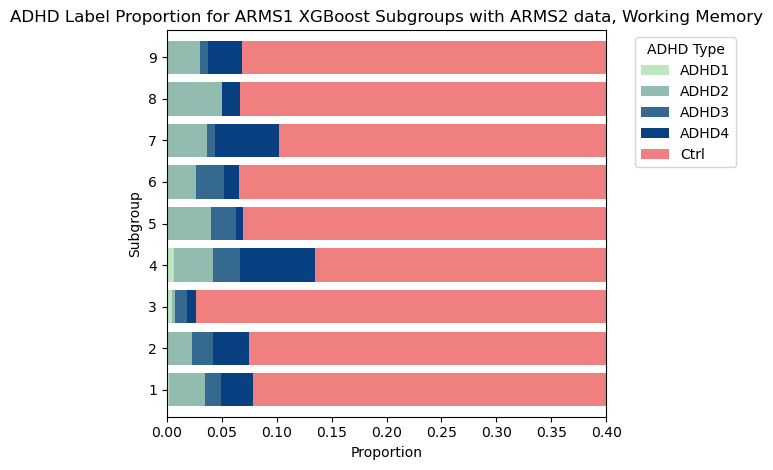

In [79]:
#plot the horizontal bar chart of the adhd label proportion data
import matplotlib.colors as mcolors

# Create a colormap
n_categories = len(df_pivot.columns)
gradient_color = plt.cm.GnBu
start_color = gradient_color(0.3)
end_color = gradient_color(1.0)
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_GnBu", [start_color, end_color], N=n_categories)
gradient_range = [custom_cmap(1. * i / (n_categories - 2)) for i in range(n_categories - 1)]

last_column_color = 'lightcoral'
color_range = gradient_range + [last_column_color]

#create the horizontal stacked bar chart
plt.figure(figsize=(12, 10))
ax = df_pivot.plot(kind='barh', stacked=True, width=0.8, color=color_range)
plt.xlim(0, 0.4)

#customize the plot
plt.title('ADHD Label Proportion for ARMS1 XGBoost Subgroups with ARMS2 data, Working Memory')
plt.xlabel('Proportion')
plt.ylabel('Subgroup')

#remove the legend from its current position
plt.legend().remove()

#add a legend to the right of the plot
plt.legend(title='ADHD Type', bbox_to_anchor=(1.05, 1), loc='upper left')

#add percentage labels on the bars
#for c in ax.containers:
#    ax.bar_label(c, fmt='%.2f%%', label_type='center')

#adjust layout and display the plot
plt.tight_layout()
plt.savefig('./list_adhd_proportions_arms1xgb_arms2data_remake.png', dpi=300, bbox_inches='tight')
plt.show()